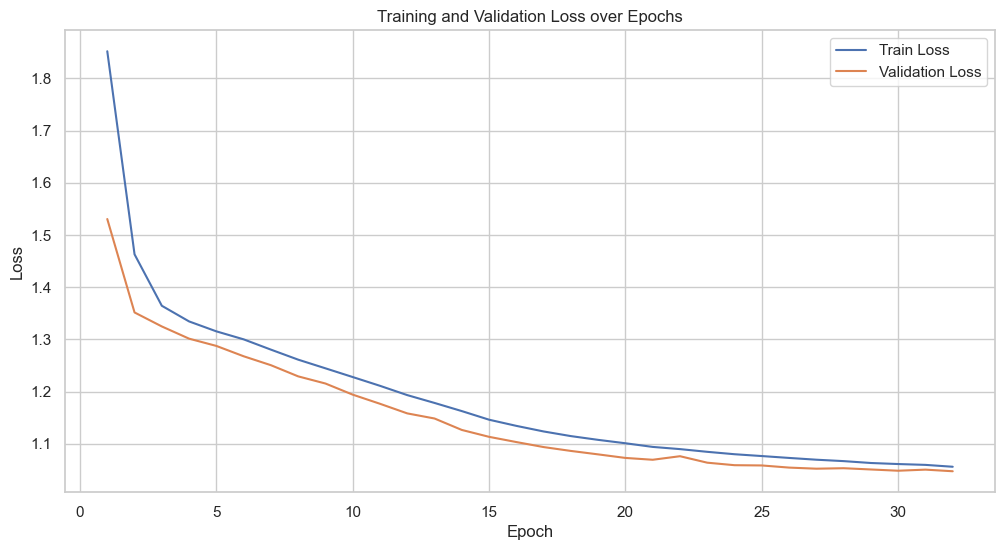

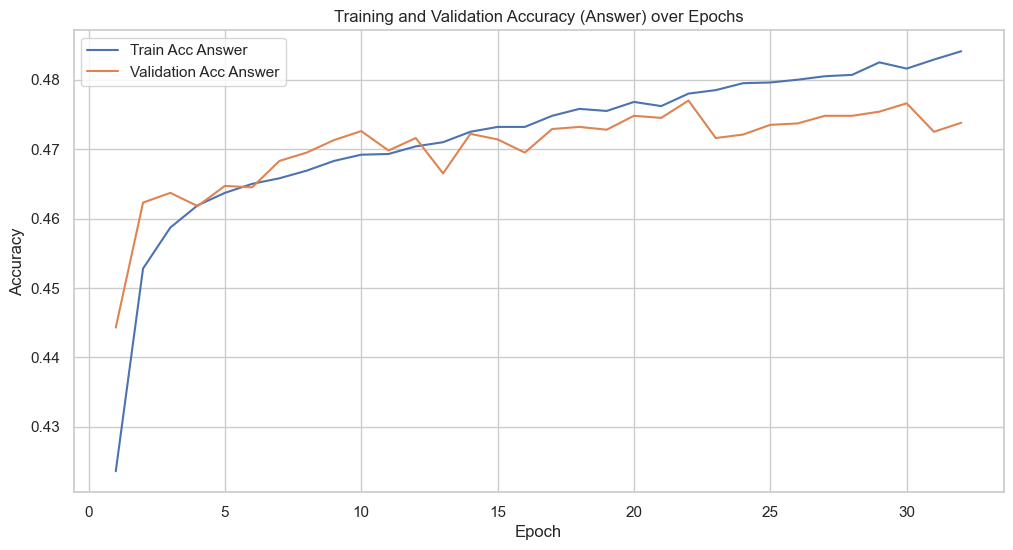

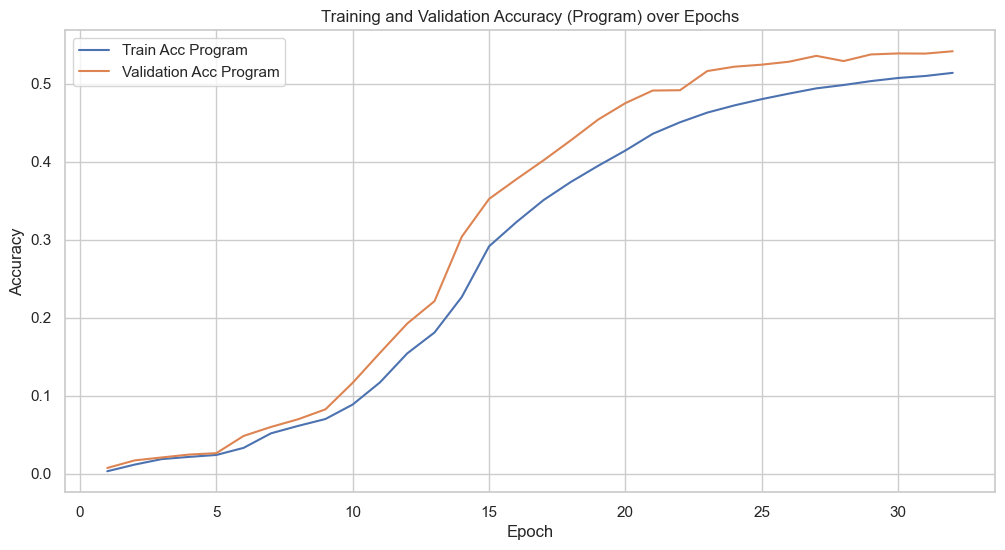

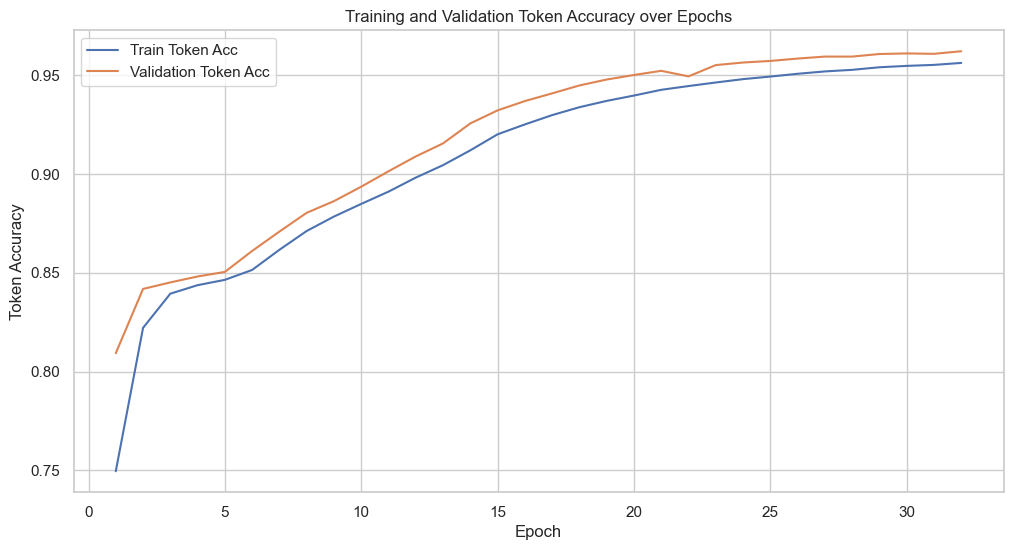

In [ ]:
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Replace the multiline string below with your actual log text
log_text = """
Epoch 1/100
Train Loss: 1.8518, Train Acc Answer: 0.4236, Train Acc Program: 0.0029, Train Token Acc: 0.7496
Val Loss: 1.5305, Val Acc Answer: 0.4443, Val Acc Program: 0.0071, Val Token Acc: 0.8093
Best model saved.

Epoch 2/100
Train Loss: 1.4629, Train Acc Answer: 0.4528, Train Acc Program: 0.0114, Train Token Acc: 0.8221
Val Loss: 1.3516, Val Acc Answer: 0.4623, Val Acc Program: 0.0168, Val Token Acc: 0.8418
Best model saved.

Epoch 3/100
Train Loss: 1.3644, Train Acc Answer: 0.4587, Train Acc Program: 0.0185, Train Token Acc: 0.8394
Val Loss: 1.3248, Val Acc Answer: 0.4637, Val Acc Program: 0.0206, Val Token Acc: 0.8451
Best model saved.

Epoch 4/100
Train Loss: 1.3344, Train Acc Answer: 0.4619, Train Acc Program: 0.0213, Train Token Acc: 0.8437
Val Loss: 1.3014, Val Acc Answer: 0.4618, Val Acc Program: 0.0243, Val Token Acc: 0.8481
No improvement in validation accuracy for 1 epoch(s).

Epoch 5/100
Train Loss: 1.3154, Train Acc Answer: 0.4637, Train Acc Program: 0.0238, Train Token Acc: 0.8464
Val Loss: 1.2875, Val Acc Answer: 0.4647, Val Acc Program: 0.0261, Val Token Acc: 0.8504
Best model saved.

Epoch 6/100
Train Loss: 1.3001, Train Acc Answer: 0.4650, Train Acc Program: 0.0329, Train Token Acc: 0.8514
Val Loss: 1.2677, Val Acc Answer: 0.4645, Val Acc Program: 0.0482, Val Token Acc: 0.8610
No improvement in validation accuracy for 1 epoch(s).

Epoch 7/100
Train Loss: 1.2804, Train Acc Answer: 0.4658, Train Acc Program: 0.0515, Train Token Acc: 0.8616
Val Loss: 1.2506, Val Acc Answer: 0.4683, Val Acc Program: 0.0597, Val Token Acc: 0.8708
Best model saved.

Epoch 8/100
Train Loss: 1.2612, Train Acc Answer: 0.4669, Train Acc Program: 0.0611, Train Token Acc: 0.8711
Val Loss: 1.2292, Val Acc Answer: 0.4695, Val Acc Program: 0.0696, Val Token Acc: 0.8803
Best model saved.

Epoch 9/100
Train Loss: 1.2446, Train Acc Answer: 0.4683, Train Acc Program: 0.0699, Train Token Acc: 0.8784
Val Loss: 1.2155, Val Acc Answer: 0.4713, Val Acc Program: 0.0823, Val Token Acc: 0.8862
Best model saved.

Epoch 10/100
Train Loss: 1.2279, Train Acc Answer: 0.4692, Train Acc Program: 0.0885, Train Token Acc: 0.8848
Val Loss: 1.1942, Val Acc Answer: 0.4726, Val Acc Program: 0.1164, Val Token Acc: 0.8935
Best model saved.

Epoch 11/100
Train Loss: 1.2111, Train Acc Answer: 0.4693, Train Acc Program: 0.1169, Train Token Acc: 0.8910
Val Loss: 1.1767, Val Acc Answer: 0.4698, Val Acc Program: 0.1548, Val Token Acc: 0.9013
No improvement in validation accuracy for 1 epoch(s).

Epoch 12/100
Train Loss: 1.1933, Train Acc Answer: 0.4704, Train Acc Program: 0.1541, Train Token Acc: 0.8981
Val Loss: 1.1583, Val Acc Answer: 0.4716, Val Acc Program: 0.1924, Val Token Acc: 0.9088
No improvement in validation accuracy for 2 epoch(s).

Epoch 13/100
Train Loss: 1.1783, Train Acc Answer: 0.4710, Train Acc Program: 0.1809, Train Token Acc: 0.9044
Val Loss: 1.1485, Val Acc Answer: 0.4665, Val Acc Program: 0.2211, Val Token Acc: 0.9154
No improvement in validation accuracy for 3 epoch(s).

Epoch 14/100
Train Loss: 1.1627, Train Acc Answer: 0.4725, Train Acc Program: 0.2265, Train Token Acc: 0.9119
Val Loss: 1.1266, Val Acc Answer: 0.4722, Val Acc Program: 0.3038, Val Token Acc: 0.9255
No improvement in validation accuracy for 4 epoch(s).

Epoch 15/100
Train Loss: 1.1462, Train Acc Answer: 0.4732, Train Acc Program: 0.2914, Train Token Acc: 0.9200
Val Loss: 1.1134, Val Acc Answer: 0.4714, Val Acc Program: 0.3522, Val Token Acc: 0.9321
No improvement in validation accuracy for 5 epoch(s).

Epoch 16/100
Train Loss: 1.1344, Train Acc Answer: 0.4732, Train Acc Program: 0.3224, Train Token Acc: 0.9250
Val Loss: 1.1034, Val Acc Answer: 0.4695, Val Acc Program: 0.3774, Val Token Acc: 0.9368
No improvement in validation accuracy for 6 epoch(s).

Epoch 17/100
Train Loss: 1.1237, Train Acc Answer: 0.4748, Train Acc Program: 0.3508, Train Token Acc: 0.9297
Val Loss: 1.0938, Val Acc Answer: 0.4729, Val Acc Program: 0.4018, Val Token Acc: 0.9407
Best model saved.

Epoch 18/100
Train Loss: 1.1148, Train Acc Answer: 0.4758, Train Acc Program: 0.3740, Train Token Acc: 0.9337
Val Loss: 1.0864, Val Acc Answer: 0.4732, Val Acc Program: 0.4274, Val Token Acc: 0.9447
Best model saved.

Epoch 19/100
Train Loss: 1.1076, Train Acc Answer: 0.4755, Train Acc Program: 0.3947, Train Token Acc: 0.9369
Val Loss: 1.0798, Val Acc Answer: 0.4728, Val Acc Program: 0.4540, Val Token Acc: 0.9477
No improvement in validation accuracy for 1 epoch(s).

Epoch 20/100
Train Loss: 1.1011, Train Acc Answer: 0.4768, Train Acc Program: 0.4143, Train Token Acc: 0.9396
Val Loss: 1.0730, Val Acc Answer: 0.4748, Val Acc Program: 0.4751, Val Token Acc: 0.9500
Best model saved.

Epoch 21/100
Train Loss: 1.0941, Train Acc Answer: 0.4762, Train Acc Program: 0.4357, Train Token Acc: 0.9425
Val Loss: 1.0695, Val Acc Answer: 0.4745, Val Acc Program: 0.4912, Val Token Acc: 0.9521
No improvement in validation accuracy for 1 epoch(s).

Epoch 22/100
Train Loss: 1.0899, Train Acc Answer: 0.4780, Train Acc Program: 0.4505, Train Token Acc: 0.9444
Val Loss: 1.0763, Val Acc Answer: 0.4770, Val Acc Program: 0.4916, Val Token Acc: 0.9493
Best model saved.

Epoch 23/100
Train Loss: 1.0847, Train Acc Answer: 0.4785, Train Acc Program: 0.4629, Train Token Acc: 0.9462
Val Loss: 1.0639, Val Acc Answer: 0.4716, Val Acc Program: 0.5162, Val Token Acc: 0.9550
No improvement in validation accuracy for 1 epoch(s).

Epoch 24/100
Train Loss: 1.0801, Train Acc Answer: 0.4795, Train Acc Program: 0.4722, Train Token Acc: 0.9479
Val Loss: 1.0591, Val Acc Answer: 0.4721, Val Acc Program: 0.5218, Val Token Acc: 0.9563
No improvement in validation accuracy for 2 epoch(s).

Epoch 25/100
Train Loss: 1.0766, Train Acc Answer: 0.4796, Train Acc Program: 0.4802, Train Token Acc: 0.9492
Val Loss: 1.0586, Val Acc Answer: 0.4735, Val Acc Program: 0.5244, Val Token Acc: 0.9571
No improvement in validation accuracy for 3 epoch(s).

Epoch 26/100
Train Loss: 1.0730, Train Acc Answer: 0.4800, Train Acc Program: 0.4873, Train Token Acc: 0.9506
Val Loss: 1.0545, Val Acc Answer: 0.4737, Val Acc Program: 0.5282, Val Token Acc: 0.9583
No improvement in validation accuracy for 4 epoch(s).

Epoch 27/100
Train Loss: 1.0696, Train Acc Answer: 0.4805, Train Acc Program: 0.4940, Train Token Acc: 0.9518
Val Loss: 1.0524, Val Acc Answer: 0.4748, Val Acc Program: 0.5357, Val Token Acc: 0.9593
No improvement in validation accuracy for 5 epoch(s).

Epoch 28/100
Train Loss: 1.0669, Train Acc Answer: 0.4807, Train Acc Program: 0.4983, Train Token Acc: 0.9526
Val Loss: 1.0533, Val Acc Answer: 0.4748, Val Acc Program: 0.5290, Val Token Acc: 0.9593
No improvement in validation accuracy for 6 epoch(s).

Epoch 29/100
Train Loss: 1.0633, Train Acc Answer: 0.4825, Train Acc Program: 0.5033, Train Token Acc: 0.9539
Val Loss: 1.0509, Val Acc Answer: 0.4754, Val Acc Program: 0.5375, Val Token Acc: 0.9606
No improvement in validation accuracy for 7 epoch(s).

Epoch 30/100
Train Loss: 1.0613, Train Acc Answer: 0.4816, Train Acc Program: 0.5073, Train Token Acc: 0.9546
Val Loss: 1.0485, Val Acc Answer: 0.4766, Val Acc Program: 0.5388, Val Token Acc: 0.9609
No improvement in validation accuracy for 8 epoch(s).

Epoch 31/100
Train Loss: 1.0597, Train Acc Answer: 0.4829, Train Acc Program: 0.5099, Train Token Acc: 0.9551
Val Loss: 1.0506, Val Acc Answer: 0.4725, Val Acc Program: 0.5386, Val Token Acc: 0.9607
No improvement in validation accuracy for 9 epoch(s).

Epoch 32/100
Train Loss: 1.0561, Train Acc Answer: 0.4841, Train Acc Program: 0.5139, Train Token Acc: 0.9561
Val Loss: 1.0475, Val Acc Answer: 0.4738, Val Acc Program: 0.5416, Val Token Acc: 0.9620
No improvement in validation accuracy for 10 epoch(s).
Early stopping triggered. Stopping training.
"""

# Regular expressions to extract metrics
epoch_pattern = r"Epoch (\d+)/\d+"
train_loss_pattern = r"Train Loss: ([\d.]+)"
train_acc_answer_pattern = r"Train Acc Answer: ([\d.]+)"
train_acc_program_pattern = r"Train Acc Program: ([\d.]+)"
train_token_acc_pattern = r"Train Token Acc: ([\d.]+)"
val_loss_pattern = r"Val Loss: ([\d.]+)"
val_acc_answer_pattern = r"Val Acc Answer: ([\d.]+)"
val_acc_program_pattern = r"Val Acc Program: ([\d.]+)"
val_token_acc_pattern = r"Val Token Acc: ([\d.]+)"

# Split the log into epochs
epochs = log_text.strip().split("Epoch ")[1:]  # Split and remove any leading text

data = []

for epoch in epochs:
    # Extract epoch number
    epoch_num_match = re.search(epoch_pattern, f"Epoch {epoch}")
    epoch_num = int(epoch_num_match.group(1)) if epoch_num_match else None

    # Extract all metrics
    train_loss = float(re.search(train_loss_pattern, epoch).group(1)) if re.search(train_loss_pattern, epoch) else None
    train_acc_answer = float(re.search(train_acc_answer_pattern, epoch).group(1)) if re.search(train_acc_answer_pattern, epoch) else None
    train_acc_program = float(re.search(train_acc_program_pattern, epoch).group(1)) if re.search(train_acc_program_pattern, epoch) else None
    train_token_acc = float(re.search(train_token_acc_pattern, epoch).group(1)) if re.search(train_token_acc_pattern, epoch) else None
    val_loss = float(re.search(val_loss_pattern, epoch).group(1)) if re.search(val_loss_pattern, epoch) else None
    val_acc_answer = float(re.search(val_acc_answer_pattern, epoch).group(1)) if re.search(val_acc_answer_pattern, epoch) else None
    val_acc_program = float(re.search(val_acc_program_pattern, epoch).group(1)) if re.search(val_acc_program_pattern, epoch) else None
    val_token_acc = float(re.search(val_token_acc_pattern, epoch).group(1)) if re.search(val_token_acc_pattern, epoch) else None

    # Append to data list
    data.append({
        "Epoch": epoch_num,
        "Train Loss": train_loss,
        "Train Acc Answer": train_acc_answer,
        "Train Acc Program": train_acc_program,
        "Train Token Acc": train_token_acc,
        "Val Loss": val_loss,
        "Val Acc Answer": val_acc_answer,
        "Val Acc Program": val_acc_program,
        "Val Token Acc": val_token_acc
    })

# Create DataFrame
df = pd.DataFrame(data)

# Sort by Epoch just in case
df = df.sort_values(by="Epoch")

# Set style for seaborn
sns.set(style="whitegrid")


# Normalize the validation metrics
scaler = MinMaxScaler()
val_metrics = df[["Val Loss", "Val Acc Answer", "Val Acc Program", "Val Token Acc"]]
val_metrics_normalized = scaler.fit_transform(val_metrics)
val_metrics_normalized = pd.DataFrame(val_metrics_normalized, columns=["Val Loss", "Val Acc Answer", "Val Acc Program", "Val Token Acc"])

# Set style for seaborn
sns.set(style="whitegrid")

# Plotting All Validation Metrics (Normalized)
plt.figure(figsize=(12, 6))
plt.plot(df["Epoch"], val_metrics_normalized["Val Loss"], label="Val Loss (Normalized)", marker='o')
plt.plot(df["Epoch"], val_metrics_normalized["Val Acc Answer"], label="Val Acc Answer (Normalized)", marker='o')
plt.plot(df["Epoch"], val_metrics_normalized["Val Acc Program"], label="Val Acc Program (Normalized)", marker='o')
plt.plot(df["Epoch"], val_metrics_normalized["Val Token Acc"], label="Val Token Acc (Normalized)", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Normalized Value")
plt.title("All Validation Metrics (Normalized) over Epochs")
plt.legend()
plt.show()


In [2]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
